In [21]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


In [28]:
# Load the scores file
scrs = pd.read_csv('scores/scores_1617533286.csv', delimiter=',')
print(scrs)

    tp    tn  fp  fn  precision    recall   f_score  epoch  batch
0   78  3914  20  20   0.795918  0.795918  0.795918      1      0
1   80  3924  14  14   0.851064  0.851064  0.851064      1     10
2   92  3917   5  18   0.948454  0.836364  0.888889      1     20
3   87  3921  12  12   0.878788  0.878788  0.878788      1     30
4   89  3923   9  11   0.908163  0.890000  0.898990      1     40
..  ..   ...  ..  ..        ...       ...       ...    ...    ...
89  77  3928   8  19   0.905882  0.802083  0.850829      1    890
90  76  3923  15  18   0.835165  0.808511  0.821622      1    900
91  76  3926  11  19   0.873563  0.800000  0.835165      1    910
92  89  3912  11  20   0.890000  0.816514  0.851675      1    920
93  84  3917  12  19   0.875000  0.815534  0.844221      1    930

[94 rows x 9 columns]


In [29]:
# Add cumulative scores
cols = ['tp', 'tn', 'fp', 'fn']
for col in cols:
    n_col = 'sum_' + col
    scrs[n_col] = scrs[col].cumsum()
scrs['sum_precision'] = (scrs['sum_tp'] / (scrs['sum_tp'] + scrs['sum_fp'] + 1e-12))
scrs['sum_recall'] = (scrs['sum_tp'] / (scrs['sum_tp'] + scrs['sum_fn'] + 1e-12))
scrs['sum_f_score'] = (2 * scrs['sum_precision'] * scrs['sum_recall'])/( scrs['sum_precision'] + scrs['sum_recall'])

No handles with labels found to put in legend.


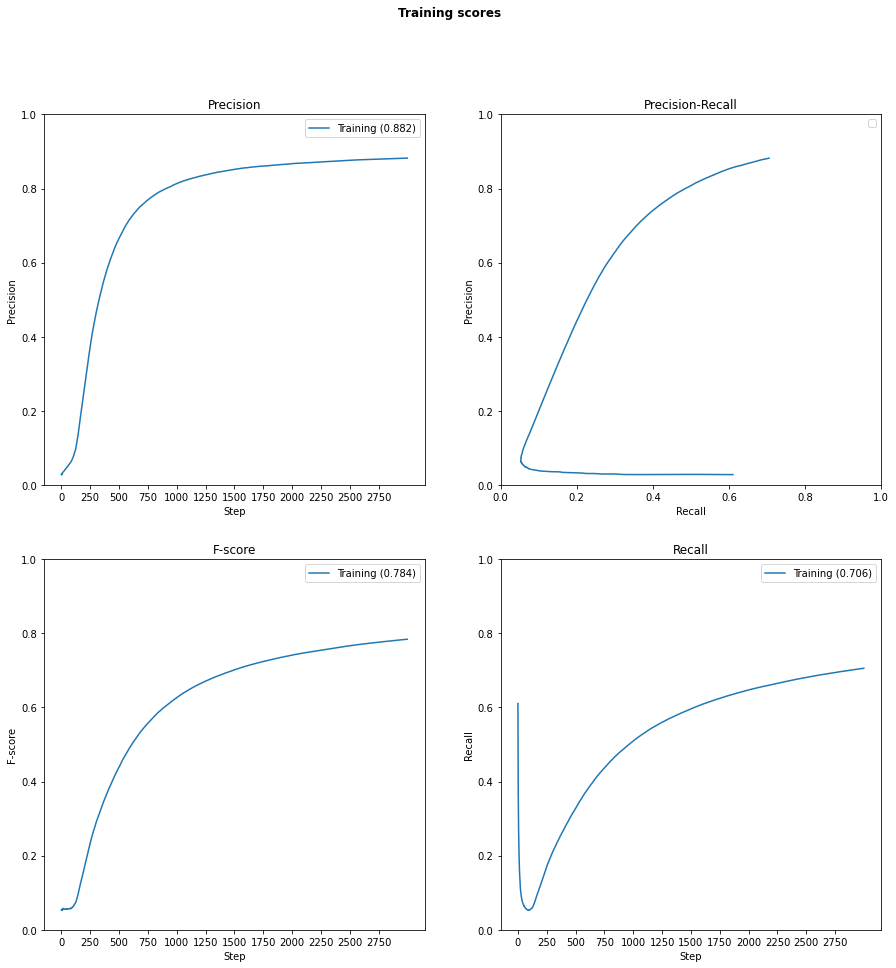

In [27]:
# TRAINING SCORES

plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['savefig.facecolor'] = 'white'
fig, ((pre_ax, p_r_ax), (fsc_ax, rec_ax)) = plt.subplots(2, 2)
fig.suptitle('Training scores',fontweight = "bold")
pre_ax.title.set_text('Precision')
pre_ax.set_ylim(0.0, 1.0)
pre_ax.plot(scrs.sum_precision, label = f'Training ({round(scrs.sum_precision.iloc[-1], 3)})')
pre_ax.set_xticks(list(scrs.index)[0::250])
pre_ax.set_xticklabels(list(scrs.index)[0::250])
pre_ax.set_xlabel('Step')
pre_ax.set_ylabel('Precision')
pre_ax.legend()
p_r_ax.title.set_text('Precision-Recall')
p_r_ax.set_xlim(0.0, 1.0)
p_r_ax.set_ylim(0.0, 1.0)
p_r_ax.plot(scrs.sum_recall, scrs.sum_precision)
p_r_ax.set_xlabel('Recall')
p_r_ax.set_ylabel('Precision')
p_r_ax.legend()
rec_ax.title.set_text('Recall')
rec_ax.set_ylim(0.0, 1.0)
rec_ax.plot(scrs.sum_recall, label = f'Training ({round(scrs.sum_recall.iloc[-1], 3)})')
rec_ax.set_xticks(list(scrs.index)[0::250])
rec_ax.set_xticklabels(list(scrs.index)[0::250])
rec_ax.set_xlabel('Step')
rec_ax.set_ylabel('Recall')
rec_ax.legend()
fsc_ax.title.set_text('F-score')
fsc_ax.set_ylim(0.0, 1.0)
fsc_ax.plot(scrs.sum_f_score, label = f'Training ({round(scrs.sum_f_score.iloc[-1], 3)})')
fsc_ax.set_xticks(list(scrs.index)[0::250])
fsc_ax.set_xticklabels(list(scrs.index)[0::250])
fsc_ax.set_xlabel('Step')
fsc_ax.set_ylabel('F-score')
fsc_ax.legend()
fig.savefig('scores/training-scores')

No handles with labels found to put in legend.


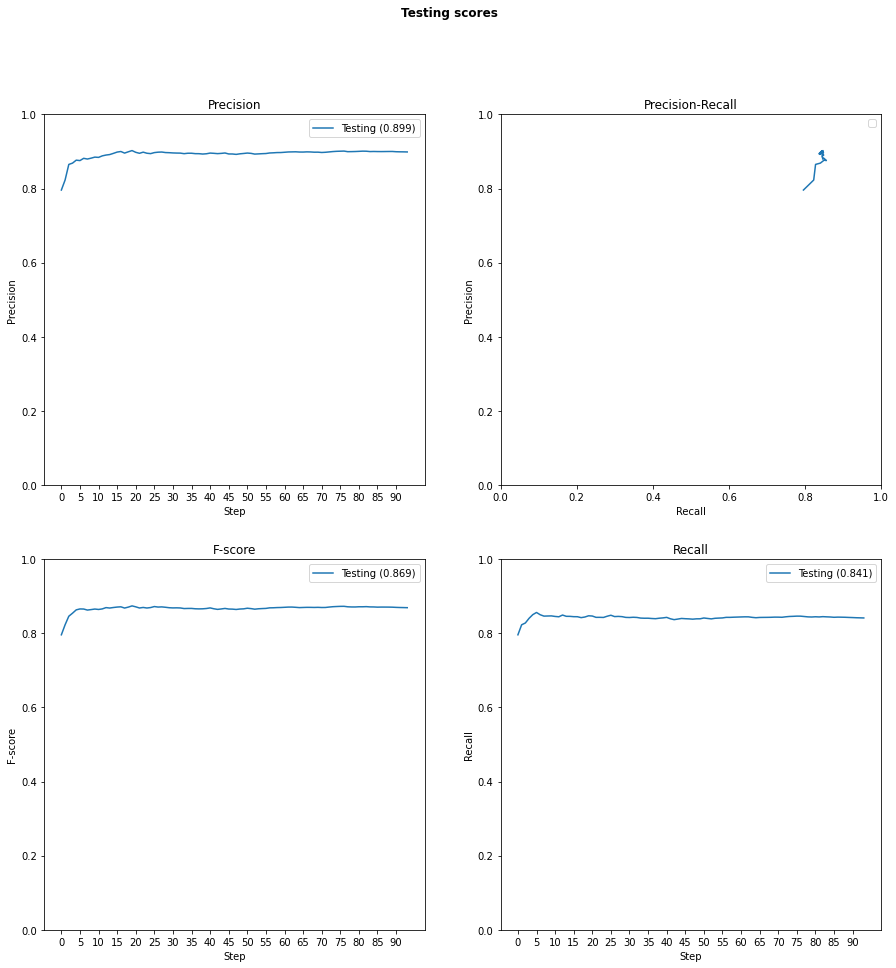

In [30]:
# Testing SCORES

plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['savefig.facecolor'] = 'white'
fig, ((pre_ax, p_r_ax), (fsc_ax, rec_ax)) = plt.subplots(2, 2)
fig.suptitle('Testing scores',fontweight = "bold")
pre_ax.title.set_text('Precision')
pre_ax.set_ylim(0.0, 1.0)
pre_ax.plot(scrs.sum_precision, label = f'Testing ({round(scrs.sum_precision.iloc[-1], 3)})')
pre_ax.set_xticks(list(scrs.index)[0::5])
pre_ax.set_xticklabels(list(scrs.index)[0::5])
pre_ax.set_xlabel('Step')
pre_ax.set_ylabel('Precision')
pre_ax.legend()
p_r_ax.title.set_text('Precision-Recall')
p_r_ax.set_xlim(0.0, 1.0)
p_r_ax.set_ylim(0.0, 1.0)
p_r_ax.plot(scrs.sum_recall, scrs.sum_precision)
p_r_ax.set_xlabel('Recall')
p_r_ax.set_ylabel('Precision')
p_r_ax.legend()
rec_ax.title.set_text('Recall')
rec_ax.set_ylim(0.0, 1.0)
rec_ax.plot(scrs.sum_recall, label = f'Testing ({round(scrs.sum_recall.iloc[-1], 3)})')
rec_ax.set_xticks(list(scrs.index)[0::5])
rec_ax.set_xticklabels(list(scrs.index)[0::5])
rec_ax.set_xlabel('Step')
rec_ax.set_ylabel('Recall')
rec_ax.legend()
fsc_ax.title.set_text('F-score')
fsc_ax.set_ylim(0.0, 1.0)
fsc_ax.plot(scrs.sum_f_score, label = f'Testing ({round(scrs.sum_f_score.iloc[-1], 3)})')
fsc_ax.set_xticks(list(scrs.index)[0::5])
fsc_ax.set_xticklabels(list(scrs.index)[0::5])
fsc_ax.set_xlabel('Step')
fsc_ax.set_ylabel('F-score')
fsc_ax.legend()
fig.savefig('scores/testing-scores')